## Assignment 1

**Submission deadlines:** 
- get at least **2** points by Tuesday, 11.03.2025
- remaining points: last lab session before or on Tuesday, 18.03.2025

**Points:** Aim to get 8 out of 14 possible points

## Submission instructions
The class is held on-site in lab rooms. Please prepare you notebook on your computer or anywhere in the cloud (try using DeepNote or Google Colab).

Make sure you know all the questions and answers, and that the notebook contains results; before presentation do `Runtime -> Restart and run all`
![Picture title](image-20220302-183151.png)

We provide starter code, however you are not required to use it as long as you properly solve the tasks.


# Task description

## TLDR
Implement and train a neural network using pure `torch`.


## Problem 1 [2p]
Implement a two-layer network, manually set weights and biases to solve the XOR task.

A two-layer neural network implementes a function $f: \mathbb{R}^D \rightarrow \mathbb{R}^O$ where $D$ is the input dimensionality and $O$ is the output dinemsionality. The output goes through an intermediate representation (the hidden layer) with dimensionality $H$. 

The computations are as follows:
$$
\begin{aligned}
A_1 &= x W_1^T + b_1  & \qquad\text{Total input to neurons in the hidden layer (network's first layer)} \\
O_1 &= \sigma_1(A_1)  & \qquad\text{Output of the hidden layer} \\
A_2 &= O_1 W_2^T + b_2 & \qquad\text{Total input to neurons in the output layer (network's second layer)}\\
O_2 &= \sigma_2(A_2)  & \qquad\text{Output of the network}
\end{aligned}
$$

Where $W$ are weight matrices, $b$ are bias vectors, $\sigma$ are non-linear activation functions (e.g. the logistic sigmoid applied element-wise, or softmax).

For the 2D xor problem the network will:
- have 2 inputs, 2 hidden neurons, one output
- use the logistic sigmoid everywhere (that way we, when hand-designig the weights, we can assume that neurons' outputs are binary).

Therrefore the shapes of the data flowing through the network will be:
- input: $x\in\mathbb{}R^{2}$
- hidden layer parameters: $W_1\in\mathbb{}R^{2\times 2}$ and $b_1\in\mathbb{}R^{2}$
- representations in the hidden layer: $A_1\in\mathbb{}R^{2}$ and $O_1\in\mathbb{}R^{2}$
- output layer parameters: $W_2\in\mathbb{}R^{1\times 2}$ and $b_2\in\mathbb{}R^{1}$
- representations in the output layer: $A_2\in\mathbb{}R^{1}$ and $O_2\in\mathbb{}R^{1}$

The network can be seen as a logistic regression model, prefixed by a nonlinear transformation of the data.

The first tasks consists of:
- implementing the network
- selecting parametwrs ($W_1, b_1, W_2, b_2$) such that $f(x)\approx XOR(x_1, x_2)$ where the approximation is die to the sigmoids - the output may be close to 0 or 1, but doesn't need to saturate at 0 or 1.

NB: the convention on weight matrix shapes follows linear [layers in PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html).


## Problem 2 [2p]
1. Add a backward pass.
2. Use a sensible random initialization for weights and biases.
3. Numerically check the correctness of your gradient computation.

There is nice article about taking derivative over vectors and vector chain rule: https://explained.ai/matrix-calculus/ if someone don't have experience with such calculus.


## Problem 3 [2p]
1. Implement gradient descent
2. Train your network to solve 3D XOR
3. Try several hidden layer sizes, for each size record the fracton of successful trainings. Then answer:
    - What is the minimal hidden size required to solve 3D XOR (even with low reliability, when the training has to be repeated multiple times)
    - What is the minimal hidden size required to reliably solve 3D XOR
    - Which networks are easier to train - small or large ones? Why?


## Problem 4 [1p]
Replace the first nonlinearity with the [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) activation function. Find a network architecture which reliably learns the 3D XOR problem.


## Problem 5 [1p]
Add a second hidden layer to your network, implement the forward and backward pass, then demonstrate training.


## Problem 6 [2p]
Implement a way to have a _variable number_ of hidden layers. Check how deep sigmoid or ReLU networks you  can train. For simplicity you can assume that all hidden layers have the same number of neurons, and use the same activation function.


## Problem 7 [2p]
Consider the following function $\boldsymbol f: \mathbb R^n \to \mathbb R^k$:
$$ \hat{\boldsymbol y} := \boldsymbol f(\boldsymbol x\,;\,\,W, \boldsymbol b) = \mathrm{softmax}(\boldsymbol z) \qquad (\boldsymbol x \in \mathbb R^{n}, \, W \in\mathbb R^{k\times n}, \, \boldsymbol b \in \mathbb R^k), $$
where $$ \boldsymbol z = W  \boldsymbol x + \boldsymbol b $$
and $W, \boldsymbol b$ are the parameters.

Analytically derive the form of the following gradients:

$$ \frac{\partial \hat{\boldsymbol y}}{\boldsymbol z} = \ldots $$

$$ \frac{\partial \hat{\boldsymbol y}}{W_{ij}} = \ldots $$

$$ \frac{\partial \hat{\boldsymbol y}}{\boldsymbol b} = \ldots $$

# Solutions and starter code

In [11]:
import matplotlib.pyplot as plt
import torch

XOR dataset creation

(np.float64(-0.05), np.float64(1.05), np.float64(-0.05), np.float64(1.05))

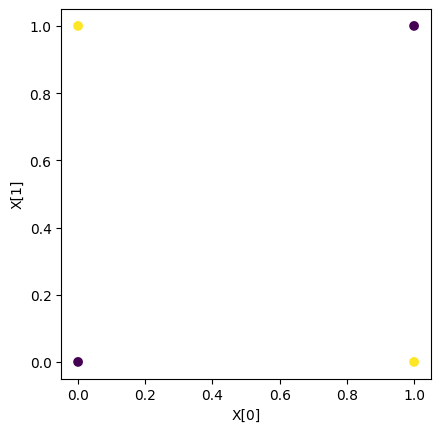

In [12]:

X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1],], dtype=torch.float64)
Y = torch.tensor([[0], [1], [1], [0],], dtype=torch.float64)

plt.scatter(
    X[:, 0], X[:, 1], c=Y[:, 0],
)
plt.xlabel("X[0]")
plt.ylabel("X[1]")
plt.axis("square")

## Problem 1

The code below contains a mock-up of a two-layer neural network. Fill in the code and manually set weights to solve the XOR problem.

Please note: the shapes are set to be compatible with PyTorch's conventions:
* a batch containing $N$ $D$-dimensional examples has shape $N\times D$ (each example is a row!)
* a weight matrix in a linear layer with $I$ inputs and $O$ outputs has shape $O \times I$
* a bias vector is a 1D vector. Please note that [broadcasting rules](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) allow us to think about it as a $1 \times D$ matrix.

In [13]:

import torch

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

def relu(x):
    return torch.maximum(x, torch.tensor(0.0, device=x.device, dtype=x.dtype))

class SmallNet:
    def __init__(self, in_features: int, num_hidden: int, dtype=torch.float32):
        self.alpha = 0.01
        self.W1 = torch.zeros((num_hidden, in_features), dtype=dtype) 
        self.b1 = torch.zeros((num_hidden,), dtype=dtype) 
        self.W2 = torch.zeros((1, num_hidden), dtype=dtype)
        self.b2 = torch.zeros((1,), dtype=dtype)
        self.init_params()

    def init_params(self):
        # TODO for Problem 2:
        # set all parameters to small random values, e.g. from N(0, 0.5)

        self.W1 = torch.randn(self.W1.shape, dtype= self.W1.dtype) * torch.sqrt(torch.tensor(0.5))
        self.b1 = torch.randn(self.b1.shape, dtype= self.W1.dtype) * torch.sqrt(torch.tensor(0.5))
        self.W2 = torch.randn(self.W2.shape, dtype= self.W1.dtype) * torch.sqrt(torch.tensor(0.5))
        self.b2 = torch.randn(self.b2.shape, dtype= self.W1.dtype) * torch.sqrt(torch.tensor(0.5))
        
    def forward(self, X, Y=None, do_backward=False, use_relu = False):
        if use_relu:
            activation = relu
        else:
            activation = sigmoid
            
        A1 = X @ self.W1.T + self.b1
        O1 = activation(A1)
        A2 = O1 @ self.W2.T + self.b2
        O2 = sigmoid(A2)
        
        if Y is not None:
            loss = - (Y * torch.log(O2) + (1 - Y) * torch.log(1 - O2))
            loss = loss.sum() / X.shape[0]
        else:
            loss = torch.nan

        if do_backward:
            A2_grad = (O2 - Y) / X.shape[0]
            self.b2_grad = A2_grad.sum(0)
            self.W2_grad = A2_grad.T @ O1
            O1_grad = A2_grad @ self.W2
            
            if use_relu:
                A1_grad = O1_grad * (A1 > 0).float() 
            else:
                A1_grad = O1_grad * O1 * (1 - O1) 
            
            self.b1_grad = A1_grad.sum(0)
            self.W1_grad = A1_grad.T @ X

        return O2, loss
    
    def train(self, X, Y, steps=100000, use_relu = False):
        for i in range(steps):
            _, loss = self.forward(X, Y, do_backward=True, use_relu = use_relu)
            if (i % (steps//20)) == 0:
                print(f"after {i} steps \tloss={loss}")
            for param_name in ["W1", "b1", "W2", "b2"]:
                param = getattr(self, param_name)
                param[:] = param - self.alpha * getattr(self, param_name + "_grad")
        
    def predict(self, X, Y, use_relu=False):
        predictions, loss = self.forward(X, Y, use_relu=use_relu)
        for x, p in zip(X, predictions):
            print(f"XORnet({x}) = {p[0]}")
        return predictions, loss



In [14]:

def PROBLEM_1():
    net = SmallNet(2, 2, dtype=torch.float64)
    net.W1 = torch.tensor([[6, 6], [-5, -5]], dtype=torch.float64) * 10
    net.b1 = torch.tensor([-2.5, 7.5], dtype=torch.float64) * 10
    net.W2 = torch.tensor([[10, 10]], dtype=torch.float64) * 10
    net.b2 = torch.tensor([-15], dtype=torch.float64) * 10
    net.predict(X, Y)

# PROBLEM_1()


## Problem 2

In [15]:
def check_grad(net, param_name, X, Y, eps= 1e-5):
    """A gradient checking routine"""

    param = getattr(net, param_name)
    param_flat_accessor = param.reshape(-1)

    grad = torch.empty_like(param)
    grad_flat_accessor = grad.reshape(-1)

    net.forward(X, Y, do_backward=True)
    orig_grad = getattr(net, param_name + "_grad")
    assert param.shape == orig_grad.shape

    for i in range(param_flat_accessor.shape[0]):
        orig_val = param_flat_accessor[i].item()
        param_flat_accessor[i] = orig_val + eps
        _, loss_positive = net.forward(X, Y)
        param_flat_accessor[i] = orig_val - eps
        _, loss_negative = net.forward(X, Y)
        param_flat_accessor[i] = orig_val
        grad_flat_accessor[i] = (loss_positive - loss_negative) / (2 * eps)
    assert torch.allclose(grad, orig_grad)
    return grad, orig_grad


In [16]:
def PROBLEM_2():
    net = SmallNet(2, 2, dtype=torch.float64)
    for param_name in ["W1", "b1", "W2", "b2"]:
        check_grad(net, param_name, X, Y)
        
# PROBLEM_2()

## Problem 3

In [17]:
def PROBLEM_3_A():
    net = SmallNet(2, 10, dtype=torch.float64)
    net.train(X, Y, steps=100001)
    net.predict(X,Y)
    
PROBLEM_3_A()

after 0 steps 	loss=0.6934399562231859
after 5000 steps 	loss=0.6668986140539641
after 10000 steps 	loss=0.6064930288070156
after 15000 steps 	loss=0.4684461593592498
after 20000 steps 	loss=0.2871204071631336
after 25000 steps 	loss=0.15939022045077308
after 30000 steps 	loss=0.09491823787836852
after 35000 steps 	loss=0.06266168684445222
after 40000 steps 	loss=0.044958214368815176
after 45000 steps 	loss=0.03427791102117445
after 50000 steps 	loss=0.027318921286349565
after 55000 steps 	loss=0.022503885634954094
after 60000 steps 	loss=0.019012033618729763
after 65000 steps 	loss=0.016383603914706668
after 70000 steps 	loss=0.014344722400780321
after 75000 steps 	loss=0.012723690435409187
after 80000 steps 	loss=0.011408165492490236
after 85000 steps 	loss=0.010321942159875067
after 90000 steps 	loss=0.009411714294627931
after 95000 steps 	loss=0.00863919458073241
after 100000 steps 	loss=0.007976244343074835
XORnet(tensor([0., 0.], dtype=torch.float64)) = 0.005551516560794374
XORne

In [18]:
def PROBLEM_3():
    X3 = [[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]
    Y3 = [[0], [1], [1], [0], [1], [0], [0], [1]]
    
    X = torch.tensor(X3, dtype=torch.float64)
    Y = torch.tensor(Y3, dtype=torch.float64)
    success_ctr = 0
    for hidden_dim in [2, 3, 5, 10, 20]:
        net = SmallNet(3, hidden_dim, dtype=torch.float64)
        net.train(X, Y, steps=100001)
        print("Hidden size: ", hidden_dim)
        predictions, loss = net.predict(X,Y)
        if torch.all(abs(predictions - Y) < 1e-1):
            print("Success")
            success_ctr += 1
    print("Success rate: ", success_ctr / 5)
    
# PROBLEM_3()

## Problem 4


In [19]:

def PROBLEM_4():
    X = torch.tensor([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]], dtype=torch.float64)
    Y = torch.tensor([[0], [1], [1], [0], [1], [0], [0], [1]], dtype=torch.float64)
    net2 = SmallNet(3, 18, dtype=torch.float64)
    net2.train(X, Y, steps=100001, use_relu = True)
    net2.predict(X,Y, use_relu = True)
# 
# PROBLEM_4()

## Problem 5

In [20]:


class SmallNet2:
    def __init__(self, in_features: int, num_hidden: int, num_layers: int, dtype=torch.float32):
        self.alpha = 0.15
        self.num_layers = num_layers
        
        self.W = []  
        self.b = []  
        self.W_grads = [] 
        self.b_grads = []  
        
        prev_features = in_features
        for _ in range(num_layers):
            self.W.append(torch.randn(num_hidden, prev_features, dtype=dtype) * torch.sqrt(torch.tensor(0.5)))
            self.b.append(torch.zeros(num_hidden, dtype=dtype))
            self.W_grads.append(torch.zeros_like(self.W[-1]))
            self.b_grads.append(torch.zeros_like(self.b[-1]))
            prev_features = num_hidden
        
        # Output
        self.W2 = torch.randn(1, prev_features, dtype=dtype) * torch.sqrt(torch.tensor(0.5))
        self.b2 = torch.zeros(1, dtype=dtype)
        self.W2_grad = torch.zeros_like(self.W2)
        self.b2_grad = torch.zeros_like(self.b2)

    def init_params(self):
        for i in range(self.num_layers):
            self.W[i] = torch.randn(self.W[i].shape, dtype=self.W[i].dtype) * torch.sqrt(torch.tensor(0.5))
            self.b[i] = torch.randn(self.b[i].shape, dtype=self.b[i].dtype) * torch.sqrt(torch.tensor(0.5))
        self.W2 = torch.randn(self.W2.shape, dtype=self.W2.dtype) * torch.sqrt(torch.tensor(0.5))
        self.b2 = torch.randn(self.b2.shape, dtype=self.W2.dtype) * torch.sqrt(torch.tensor(0.5))

    def forward(self, X, Y=None, do_backward=False, use_relu=False):
        activation = relu if use_relu else sigmoid
        activations = []
        pre_activations = []  
        A = X

        for i in range(self.num_layers):
            Z = A @ self.W[i].T + self.b[i]
            A = activation(Z)
            activations.append(A)
            pre_activations.append(Z)
        
        A2 = A @ self.W2.T + self.b2
        O2 = sigmoid(A2)

        loss = torch.nan
        if Y is not None:
            loss = - (Y * torch.log(O2) + (1 - Y) * torch.log(1 - O2))
            loss = loss.sum() / X.shape[0]

        if do_backward:

            A2_grad = (O2 - Y) / X.shape[0] 
            self.W2_grad = A2_grad.T @ activations[-1]
            self.b2_grad = A2_grad.sum(0)  
            
            O_grad = A2_grad @ self.W2  
            
            for i in range(self.num_layers - 1, -1, -1):
    
                if use_relu:
                    A_grad = O_grad * (pre_activations[i] > 0).float() 
                else:
                    A_grad = O_grad * activations[i] * (1 - activations[i])

                self.W_grads[i] = A_grad.T @ X if i == 0 else A_grad.T @ activations[i-1]  
                self.b_grads[i] = A_grad.sum(0) 

                O_grad = A_grad @ self.W[i]  

        return O2, loss

    def train(self, X, Y, steps=100000, use_relu=False):
        for i in range(steps):
            _, loss = self.forward(X, Y, do_backward=True, use_relu=use_relu)
            if (i % (steps // 20)) == 0:
                print(f"after {i} steps \tloss={loss.item()}")

            for i in range(self.num_layers):
                self.W[i] -= self.alpha * self.W_grads[i]
                self.b[i] -= self.alpha * self.b_grads[i]
            
            self.W2 -= self.alpha * self.W2_grad
            self.b2 -= self.alpha * self.b2_grad

    def predict(self, X, Y, use_relu=False):
        predictions, loss = self.forward(X, Y, use_relu=use_relu)
        for x, p in zip(X, predictions):
            print(f"XORnet({x}) = {p[0]}")
        return predictions, loss

def PROBLEM_5():
    X = torch.tensor([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], 
                      [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]], dtype=torch.float64)
    Y = torch.tensor([[0], [1], [1], [0], [1], [0], [0], [1]], dtype=torch.float64)
    net = SmallNet2(3, 5, 2, dtype=torch.float64) 
    net.train(X, Y, steps=100001, use_relu=True)
    net.predict(X, Y, use_relu=True)

def PROBLEM_6():
    X = torch.tensor([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], 
                      [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]], dtype=torch.float64)
    Y = torch.tensor([[0], [1], [1], [0], [1], [0], [0], [1]], dtype=torch.float64)
    for num_layers in [2, 3, 5, 10]: 
        print(f"Training network with {num_layers} hidden layers")
        net = SmallNet2(3, 4, num_layers, dtype=torch.float64)
        net.train(X, Y, steps=100001)
        net.predict(X, Y)

PROBLEM_5()
PROBLEM_6()


after 0 steps 	loss=0.7409109083871886
after 5000 steps 	loss=0.00032406082668115445
after 10000 steps 	loss=0.0001237402134741554
after 15000 steps 	loss=7.226012406655623e-05
after 20000 steps 	loss=4.9776227907050456e-05
after 25000 steps 	loss=3.750610137443297e-05
after 30000 steps 	loss=2.98394001490931e-05
after 35000 steps 	loss=2.4629416845239093e-05
after 40000 steps 	loss=2.0877979413371867e-05
after 45000 steps 	loss=1.806000791825961e-05
after 50000 steps 	loss=1.5872479755834983e-05
after 55000 steps 	loss=1.4129182989889063e-05
after 60000 steps 	loss=1.2709986550318824e-05
after 65000 steps 	loss=1.1534167551798684e-05
after 70000 steps 	loss=1.0545294051283755e-05
after 75000 steps 	loss=9.703140715893675e-06
after 80000 steps 	loss=8.977800280594305e-06
after 85000 steps 	loss=8.347270414915428e-06
after 90000 steps 	loss=7.794411855535914e-06
after 95000 steps 	loss=7.306090662430921e-06
after 100000 steps 	loss=6.871770140607551e-06
XORnet(tensor([0., 0., 0.], dtype

KeyboardInterrupt: 

## Problem 6

## Problem 7